In [1]:
import numpy as np
import matplotlib.pyplot as plt
import solver as mysolver             # your own solver
# import solution.solver_sol as solver  # compare your results with solution
# from scipy.integrate import solve_ivp as solver_scipy

In [2]:
# define the y' funciotn
def func_damped(t,y,K,M,L):
    force = -K * y[0] - L * y[1]     # F = - k x - L v
    f = np.zeros(len(y))
    f[0] = y[1]                      # y'[0] = v
    f[1] = force/M                   # y'[1] = a = F/M
    return f

(a) $A = 1$ cm, $ω_{0}=1$ $rads^{−1}$, $γ = 0.2$ $s^{−1}$, and $φ = −π/2$ $rad$

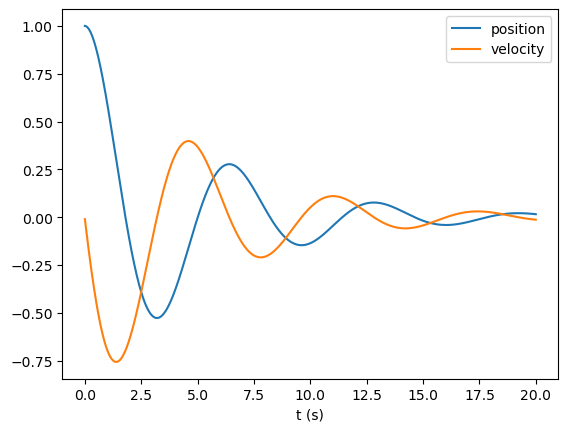

In [36]:
# Prepare the input arguments
y = np.array([1,0]) # initial condition
t_span = np.linspace(0,20, 2001)
t_eval = t_span

A = 1
omega0 = 1
gamma = 0.2
phi0 = -np.pi/2
M = 1
L = gamma*2*M
K = M*omega0


args = (K,M,L)

# use the IVP solver
sol_a = mysolver.solve_ivp(func_damped,t_span,y, "RK4", t_eval, args)

# visualize the results
plt.plot(t_eval, sol_a[0], label="position")
plt.plot(t_eval, sol_a[1], label="velocity")
plt.xlabel("t (s)")
plt.legend()
plt.show()

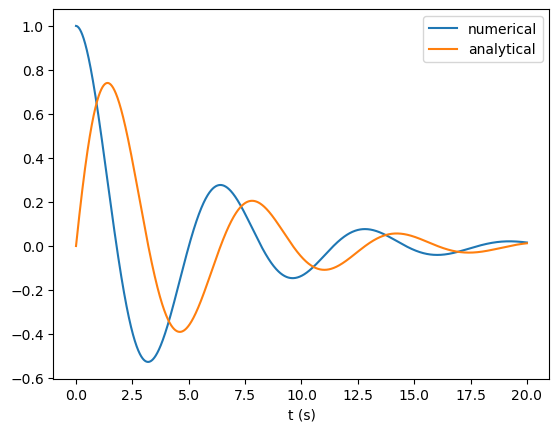

In [4]:
# Compute the analytical solution
omega  = np.sqrt(omega0**2 - gamma**2)
gamma = 0.2
xpos_ana = A * np.exp(-gamma*t_eval) * (np.cos(omega*t_eval+phi0))

# visualize the results
plt.plot(t_eval, sol_a[0], label="numerical")
plt.plot(t_eval, xpos_ana, label="analytical")
plt.xlabel("t (s)")
plt.legend()
plt.show()

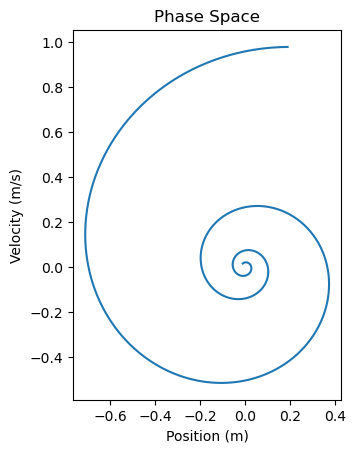

In [5]:
# evaluate the phase space
omega = gamma*sol_a[0]+sol_a[1]
u = np.sqrt(omega0**2-gamma**2)*sol_a[0]
plt.figure()
plt.plot(omega,u)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Position (m)')
plt.ylabel('Velocity (m/s)')
plt.title('Phase Space')
plt.show()

(b) $A = 1$ cm, $ω_{0}=1$ $rads^{−1}$, $γ = 1.0$ $s^{−1}$, and $φ = −π/2$ $rad$

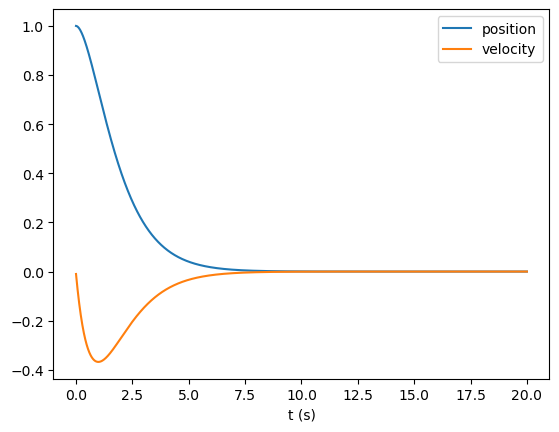

In [6]:
# Prepare the input arguments
y = np.array([1,0]) 
t_span = np.linspace(0,20, 2001)
t_eval = t_span
A = 1
K = 1
M = 1
omega0 = 1
gamma = 1.0
L = gamma*2*M
phi0 = -np.pi/2
args = (K,M,L)

# use the IVP solver
sol_b = mysolver.solve_ivp(func_damped,t_span,y, "RK4", t_eval, args)

# visualize the results
plt.plot(t_eval, sol_b[0], label="position")
plt.plot(t_eval, sol_b[1], label="velocity")
plt.xlabel("t (s)")
plt.legend()
plt.show()

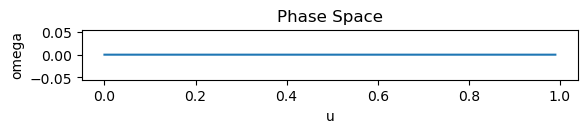

In [7]:
# evaluate the phase space
omega = gamma*sol_b[0]+sol_b[1]
u = np.sqrt(omega0**2-gamma**2)*sol_b[0]
plt.figure()
plt.plot(omega,u)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('u')
plt.ylabel('omega')
plt.title('Phase Space')
plt.show()

(c) $A = 1$ cm, $ω_{0}=1$ $rads^{−1}$, $γ = 1.2$ $s^{−1}$, and $φ = −π/2$ $rad$

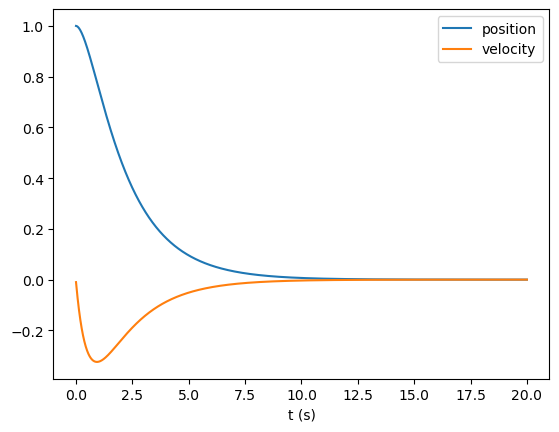

In [8]:
# Prepare the input arguments
t_span = np.linspace(0,20, 2001)
t_eval = t_span
y = np.array([1,0]) # initial condition
A = 1
K = 1
M = 1
omega0 = 1
gamma = 1.2
L = gamma*2*M
phi0 = -np.pi/2
args = (K,M,L)

# use the IVP solver
sol_c = mysolver.solve_ivp(func_damped,t_span,y, "RK4", t_eval, args)

# visualize the results
plt.plot(t_eval, sol_c[0], label="position")
plt.plot(t_eval, sol_c[1], label="velocity")
plt.xlabel("t (s)")
plt.legend()
plt.show()

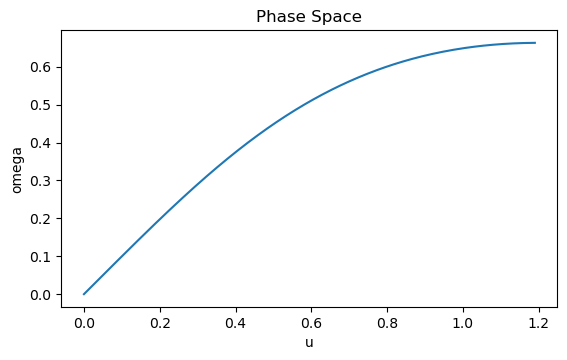

In [9]:
# evaluate the phase space
omega = gamma*sol_c[0]+sol_c[1]
u = np.sqrt(-(omega0**2-gamma**2))*sol_c[0]
plt.figure()
plt.plot(omega,u)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('u')
plt.ylabel('omega')
plt.title('Phase Space')
plt.show()


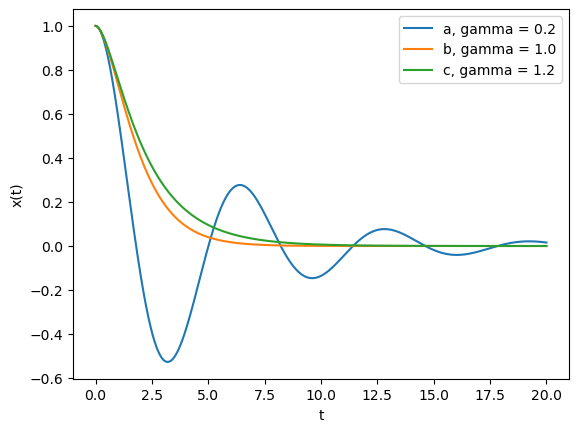

In [10]:
# Prepare the input arguments
t_span = np.linspace(0,20, 2001)
t_eval = t_span
y = np.array([1,0]) # initial condition

# compare with the funciton f = A exp(- 0.1* t)
plt.figure()
plt.plot(t_eval, sol_a[0], label="a, gamma = 0.2")
plt.plot(t_eval, sol_b[0], label="b, gamma = 1.0")
plt.plot(t_eval, sol_c[0], label="c, gamma = 1.2")
plt.legend()
plt.xlabel("t")
plt.ylabel("x(t)")
plt.show()

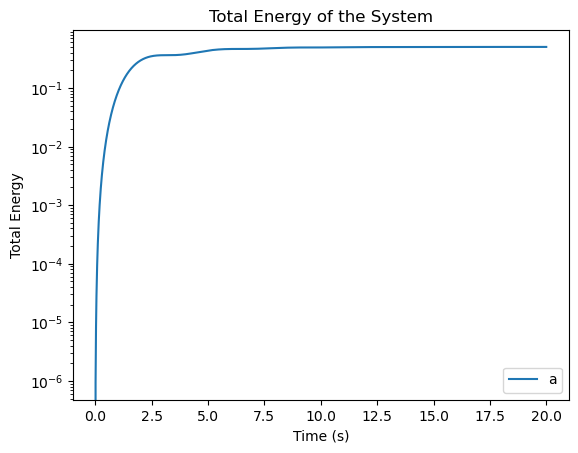

In [11]:
# evaluate the energy (error) of the problem(a)

etot_rk4_a   = 0.5*1*sol_a[0]**2 + 0.5*1*sol_a[1]**2
err_rk4_a = np.abs(etot_rk4_a - etot_rk4_a[0])
plt.figure()
plt.plot(t_eval, err_rk4_a, label='a')
plt.xlabel('Time (s)')
plt.ylabel('Total Energy')
plt.legend()
plt.yscale('log')
plt.title('Total Energy of the System')
plt.show()

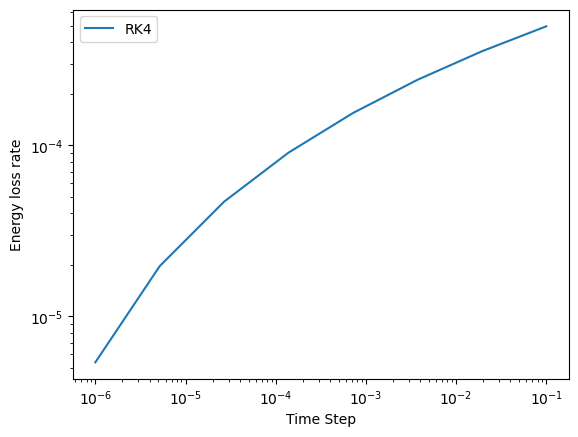

In [12]:
def convergence(dts, method="RK4"):
    """
    Parameters:
    dts: an numpy array of time steps to use
    method: a string specifying the method to use. Default is "Euler"
    
    Return:
    errs: an numpy array of errors for each time step
    """
    errs = np.zeros(len(dts))
    for i, dt in enumerate(dts):
        if method == "Euler":
            sol = mysolver.solve_ivp(func_damped,t_span,y, "RK4", t_eval, args)
        elif method == "RK2":
            sol= mysolver.solve_ivp(func_damped,t_span,y, "RK4", t_eval, args)
        elif method == "RK4":
            sol = mysolver.solve_ivp(func_damped,t_span,y, "RK4", t_eval, args)
        else:
            raise ValueError("Invalid method")
        etot = 0.5*1*sol[0]**2 + 0.5*1*sol[1]**2
        errs[i] = np.abs(etot[i+1] - etot[0])
        
    return errs

dts = np.logspace(-6, -1, 8)
errs_rk4_conv_a = convergence(dts, method="RK4")
plt.figure()
plt.plot(dts,errs_rk4_conv_a, label='RK4')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Time Step')
plt.ylabel('Energy loss rate')
plt.legend()

# Forced Oscillation

* $F_0=0.5$ and $\omega_f=0.5-1.5,$ interval = 0.05.
* $(a) \lambda=0.01$ $(b) \lambda=0.1$ $(c) \lambda=0.3$
* Make plots of D versus ωf with (a) λ = 0.01,(b) λ = 0.1, (c) λ = 0.3. Draw these three plots on the same figure. Do you find resonance? Are these resonance frequencies consistent with the analytical values?


In [13]:
# define the y' funciotn
def func_forced(t,y,K,M,L,F0,WF):
    force = -K * y[0] - L * y[1] + F0*np.cos(WF*t)    # F = - k v - L v + F0 sin(WF t)
    f = np.zeros(len(y))
    f[0] = y[1]                      # y'[0] = v
    f[1] = force/M                   # y'[1] = a = F/M
    return f                         # y' = f

# define average amplitude function
def average_amplitud(sol, t_start, t_end, dt):
    t_start_index = int(t_start/dt)
    t_end_index = int(t_end/dt)
    D = np.mean(np.abs(sol[0][t_start_index:t_end_index]))
    return D
    

In [38]:
# Prepare the input arguments

t_span = np.linspace(0,100, 2001)
t_eval = t_span
y = np.array([A,0]) # initial condition
A = 1
M = 1
K = 1
F0 =0.5
WF = np.linspace(0.5, 1.5, 21)
D_Wf_a = np.zeros((len(WF),1))
D_Wf_b = np.zeros((len(WF),1))
D_Wf_c = np.zeros((len(WF),1))

t_start = 40
t_end = 50
dt = t_eval[1]-t_eval[0]

# use the IVP solver
for n, wf in enumerate(WF):
    sol_a = mysolver.solve_ivp(func_forced,t_span,y, "RK4", t_eval, (K,M,0.01,F0,wf))
    sol_b = mysolver.solve_ivp(func_forced,t_span,y, "RK4", t_eval, (K,M,0.1,F0,wf))
    sol_c = mysolver.solve_ivp(func_forced,t_span,y, "RK4", t_eval, (K,M,0.3,F0,wf))

    D_Wf_a[n:] = average_amplitud(sol_a, t_start, t_end, dt)
    D_Wf_b[n:] = average_amplitud(sol_b, t_start, t_end, dt)
    D_Wf_c[n:] = average_amplitud(sol_c, t_start, t_end, dt)
    

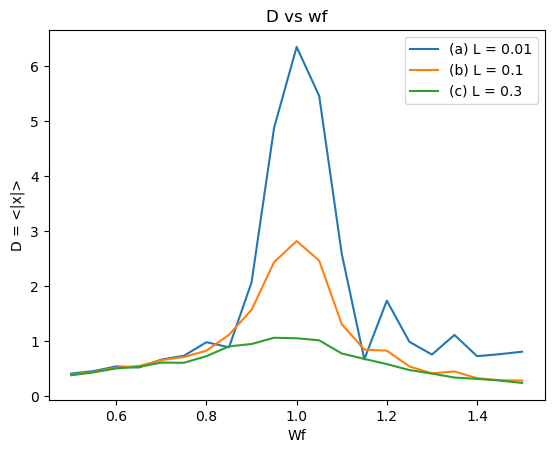

In [40]:
plt.plot(WF, D_Wf_a, label = "(a) L = 0.01")
plt.plot(WF, D_Wf_b, label = "(b) L = 0.1")
plt.plot(WF, D_Wf_c, label = "(c) L = 0.3")
plt.title("D vs wf")
plt.xlabel("Wf")
plt.ylabel("D = <|x|>")
plt.legend()
plt.show()

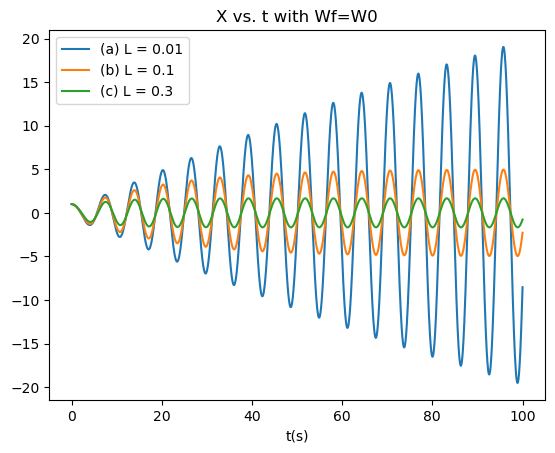

In [41]:
# at Wf = W0
sol_a = mysolver.solve_ivp(func_forced,t_span,y, "RK4", t_eval, (K,M,0.01,F0,1))
sol_b = mysolver.solve_ivp(func_forced,t_span,y, "RK4", t_eval, (K,M,0.1,F0,1))
sol_c = mysolver.solve_ivp(func_forced,t_span,y, "RK4", t_eval, (K,M,0.3,F0,1))
plt.title("X vs. t with Wf=W0")
plt.plot(t_eval, sol_a[0], label="(a) L = 0.01")
plt.plot(t_eval, sol_b[0], label="(b) L = 0.1")
plt.plot(t_eval, sol_c[0], label="(c) L = 0.3")
plt.xlabel("t(s)")
plt.legend()
plt.show()

# 4(b)
* Use the same IVP solver we developed in the class to numerically solve the system
* with initial conditions: L = C = E0 = 1, R = 0.8, and ω = 0.7. 
* Make plots of the current and the voltage VL across the inductor as functions of time.

In [17]:
# define the y' funciotn
def func_RLC(t,y,R,L,C,E0,omega):
    """
    Function to compute the derivatives of the RLC circuit
    y = [Q, dQ/dt]
    y' = f = [dQ/dt, d2Q/dt2]
    """
    f = np.zeros(len(y))
    f[0] = y[1]                                                        # y'[0] = f[0] = dQ/dt
    f[1] = -y[0]/(L*C) - R/L * y[1] + E0/L*np.sin(omega*t)             # y'[1] = f[1] = d2Q/dt2
    return f                                                           # y' = f

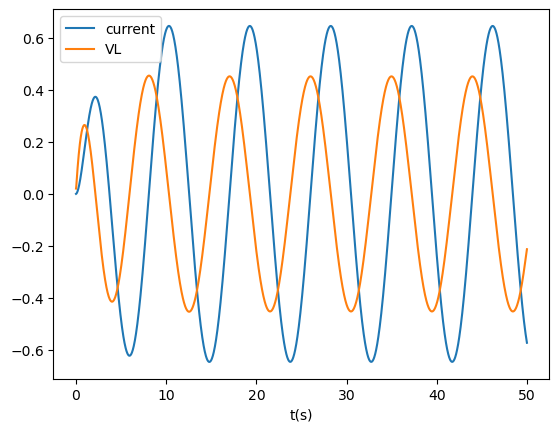

In [18]:
# Initial condition
t_span = np.linspace(0,50, 2001)
t_eval = t_span
y = np.array([0,0])
L = 1
C = 1
E0 = 1
R = 0.8
omega = 0.7

# define the y' funciotn
def func_RLC(t,y,R,L,C,E0,omega):
    """
    Function to compute the derivatives of the RLC circuit
    y = [Q, dQ/dt]
    y' = f = [dQ/dt, d2Q/dt2]
    """
    f = np.zeros(len(y))
    f[0] = y[1]                                                        # y'[0] = f[0] = dQ/dt
    f[1] = -y[0]/(L*C) - R/L * y[1] + E0/L*np.sin(omega*t)             # y'[1] = f[1] = d2Q/dt2
    return f   

def Vin(t):
    return E0*np.sin(omega*t)

# plots of the current and the voltage VL 
sol = mysolver.solve_ivp(func_RLC, t_span, y, "RK4", t_eval,(L,C, E0,R,omega))
VL = L * np.gradient(sol[1], t_eval)
plt.plot(t_eval, sol[1], label="current")
plt.plot(t_eval, VL, label="VL")
plt.xlabel("t(s)")
plt.legend()
plt.show()

# 4(c)
* Redo the problem by varying ω from 0.3 to 1.5 with an interval 0.1. Do you see any special ω? 
* What are the meaning of these frequencies?

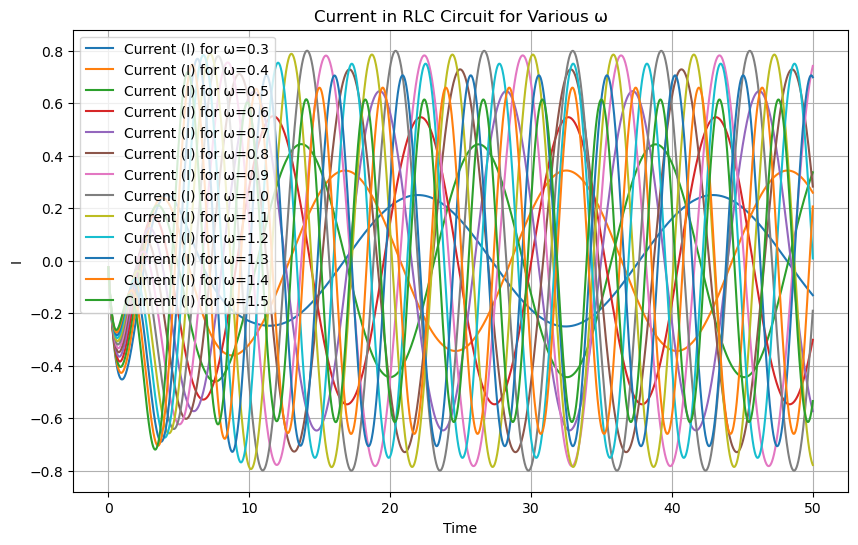

In [21]:
# Angular frequencies to evaluate
omegas = np.arange(0.3, 1.6, 0.1)

# Plot the current and voltage across the inductor for each angular frequency
plt.figure(figsize=(10, 6))
for omega in omegas:
    # Solve the initial value problem using the custom solver
    sol = mysolver.solve_ivp(func_RLC, t_span, y, "RK4", t_eval,(L,C, E0,R,omega))

    # Plot the current for this omega
    plt.plot(t_eval, sol[1], label=f'Current (I) for ω={omega:.1f}')
    

plt.xlabel('Time')
plt.ylabel('I')
plt.title('Current in RLC Circuit for Various ω')
plt.legend()
plt.grid(True)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


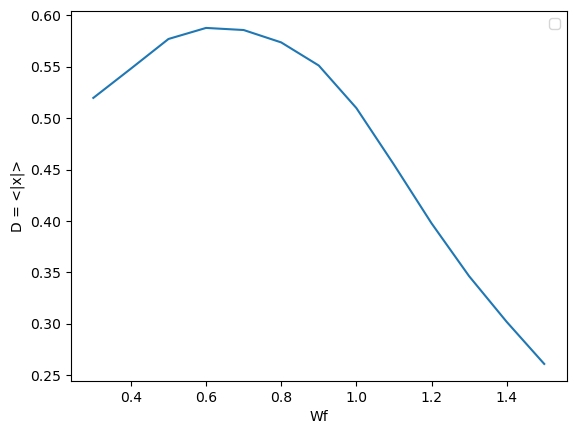

In [43]:
# Prepare the input arguments
t_span = np.linspace(0,100, 2001)
t_eval = t_span
y = np.array([A,0]) # initial condition
L=1
C=1
R = 0.8
E0=1
omegas = np.arange(0.3, 1.6, 0.1)
D_Wf_4c = np.zeros((len(omegas),1))

t_start = 40
t_end = 100
dt = t_eval[1]-t_eval[0]

# use the IVP solver
for n, w in enumerate(omegas):
    sol_4c =mysolver.solve_ivp(func_RLC, t_span, y, "RK4", t_eval,(L,C,E0,R,w))
    D_Wf_4c[n:] = average_amplitud(sol_4c, t_start, t_end, dt)

plt.plot(omegas, D_Wf_4c)
plt.xlabel("Wf")
plt.ylabel("D = <|x|>")
plt.legend()
plt.show()
